<a href="https://colab.research.google.com/github/Iamjohnko/Data-science-Project-Portfolio/blob/main/The_Sensitivity_Analysis_%26_Risk_Scoring_System_in_valuating_the_risk_profile_of_commercial_real_estate_assets_across_multiple_property_types.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sensitivity Analysis & Risk Scoring System in valuating the risk profile of commercial real estate assets across multiple property types—multifamily, retail, office, and industrial.

Project Overview

The Sensitivity Analysis & Risk Scoring System is designed to provide a standardized framework for evaluating the risk profile of commercial real estate assets across multiple property types—multifamily, retail, office, and industrial. The system automates sensitivity testing across key financial metrics such as Internal Rate of Return (IRR), Net Present Value (NPV), capitalization rates (cap rates), and equity multiples to capture a spectrum of downside, base, and upside scenarios.

Beyond traditional deterministic sensitivity tables, the project integrates agent-based modeling (ABM) to simulate tenant-level behavior (e.g., lease renewals, defaults, relocation, consumption shifts) and how these micro-decisions aggregate into portfolio-level cash flow variability. This provides investors and asset managers with a dynamic, probabilistic risk score, helping them evaluate comparative resilience across different asset classes.

Ultimately, the system aims to:

Standardize risk assessment across property types.

Automate financial scenario analysis to reduce analyst workload.

Incorporate behavioral dynamics to capture real-world uncertainty in tenant-driven markets.

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


In [ ]:

# Load dataset
df = pd.read_csv("real_estate_deals.csv")
df.head()


,Deal_ID,Property_Type,Location_Score,Market_Vacancy_Rate,Tenant_Default_Prob,Base_Rent_per_SqFt,SqFt,Cap_Rate,NOI,Equity_Investment,Debt_Ratio,Exit_Cap_Rate,Hold_Period_Years,Purchase_Price,Sale_Price,Equity_Multiple,IRR,NPV
0,DL1000,Office,4,0.051,0.080,54.73,21969,0.046,5789730,7051646,0.67,0.078,6,1.258637e+08,8.359200e+07,11.85,0.065,27686734
1,DL1001,Industrial,3,0.047,0.035,38.22,63753,0.081,4937610,5625654,0.73,0.091,9,6.095815e+07,6.484507e+07,11.53,0.128,38812836
2,DL1002,Retail,7,0.053,0.030,55.79,155542,0.059,3739536,2285711,0.41,0.088,9,6.338197e+07,5.078513e+07,22.22,0.211,31370113
3,DL1003,Retail,8,0.056,0.029,40.71,141863,0.084,2826133,11511997,0.71,0.066,3,3.364444e+07,4.544114e+07,3.95,0.230,-3033598
4,DL1004,Multifamily,4,0.047,0.056,44.80,30225,0.083,8448140,19353135,0.58,0.075,3,1.017848e+08,1.195364e+08,6.18,0.091,5991285


In [ ]:
df.tail(20)

,Deal_ID,Property_Type,Location_Score,Market_Vacancy_Rate,Tenant_Default_Prob,Base_Rent_per_SqFt,SqFt,Cap_Rate,NOI,Equity_Investment,Debt_Ratio,Exit_Cap_Rate,Hold_Period_Years,Purchase_Price,Sale_Price,Equity_Multiple,IRR,NPV
280,DL1280,Industrial,9,0.069,0.045,25.11,25782,0.056,2909381,14259034,0.47,0.082,7,5.195323e+07,4.075566e+07,2.86,0.195,6106633
281,DL1281,Office,3,0.117,0.035,23.10,144481,0.062,7526492,7730385,0.40,0.072,3,1.213950e+08,1.109330e+08,14.35,0.165,14849091
282,DL1282,Office,1,0.047,0.053,18.99,55585,0.044,8809411,4381486,0.40,0.086,8,2.002139e+08,1.200189e+08,27.39,0.183,66093802
283,DL1283,Multifamily,5,0.122,0.014,19.65,50682,0.051,7359216,15814531,0.69,0.063,3,1.442984e+08,1.239628e+08,7.84,0.205,6263117
284,DL1284,Retail,7,0.098,0.087,41.31,198936,0.070,3443295,10168326,0.66,0.094,5,4.918993e+07,4.044336e+07,3.98,0.222,7048149
285,DL1285,Multifamily,6,0.035,0.013,45.97,149992,0.077,3783616,14550508,0.52,0.050,6,4.913787e+07,8.521932e+07,5.86,0.113,8151188
286,DL1286,Office,1,0.074,0.040,32.88,104416,0.090,577175,18902654,0.64,0.089,5,6.413056e+06,7.160088e+06,0.38,0.158,-16016779
287,DL1287,Office,5,0.132,0.094,36.60,147810,0.087,2578808,12305651,0.54,0.092,8,2.964147e+07,3.284222e+07,2.67,0.218,8324813
288,DL1288,Multifamily,5,0.140,0.076,45.87,58067,0.072,1857453,15605804,0.73,0.090,3,2.579796e+07,2.190160e+07,1.40,0.248,-10033445
289,DL1289,Retail,6,0.081,0.035,15.78,193757,0.061,3511786,9085904,0.74,0.073,9,5.757026e+07,5.749191e+07,6.33,0.228,22520170


## Descriptive Statistics by Property Type

In [ ]:

# Summary statistics by property type
desc_stats = df.groupby("Property_Type")[["NOI",  ,"IRR","NPV","Equity_Multiple"]].describe().round(2)
desc_stats


NOI                                                           \
              count        mean         std       min         25%        50%   
Property_Type                                                                  
Industrial     63.0  5073717.30  2767063.87  519675.0  2856467.50  4913359.0   
Multifamily    95.0  5440478.39  2711785.81  521253.0  3326852.50  5929219.0   
Office         70.0  4841012.10  2695376.41  577175.0  2636343.25  4994732.5   
Retail         72.0  5177765.60  2668016.24  739017.0  2937921.25  5241428.5   

                                     Cap_Rate        ...         NPV  \
                      75%        max    count  mean  ...         75%   
Property_Type                                        ...               
Industrial     7387703.00  9856169.0     63.0  0.06  ...  28952487.0   
Multifamily    7611649.50  9840854.0     95.0  0.07  ...  37780883.0   
Office         6895497.75  9476766.0     70.0  0.06  ...  27527507.0   
Retail         7394158.75  9985961.0     72.0  0.07  ...  33446614.0   

                          Equity_Multiple                                  \
                      max           count   mean    std   min   25%   50%   
Property_Type                                                               
Industrial     79713796.0            63.0  10.05   9.20  0.58  3.42  7.78   
Multifamily    68980849.0            95.0   9.06   7.71  0.49  4.73  6.88   
Office         66093802.0            70.0  10.18   9.53  0.38  3.24  7.79   
Retail         67764381.0            72.0  10.10  12.00  0.50  3.97  6.22   

                             
                 75%    max  
Property_Type                
Industrial     12.78  50.67  
Multifamily    11.73  45.26  
Office         14.46  55.24  
Retail         11.74  75.72  

[4 rows x 48 columns]

## Distribution of Key Metrics

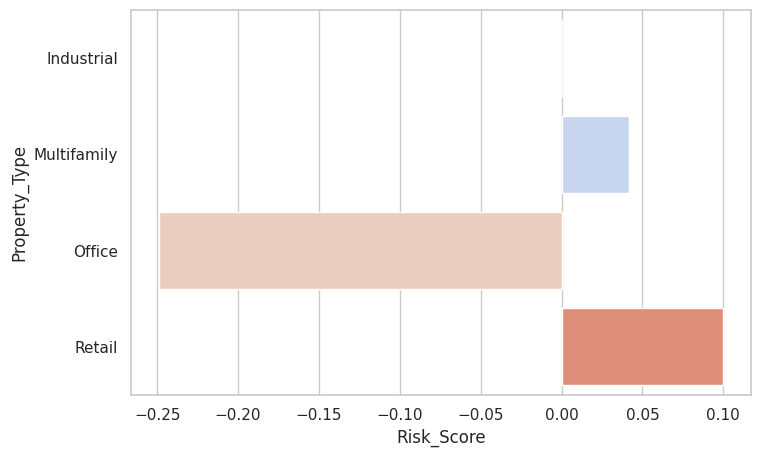

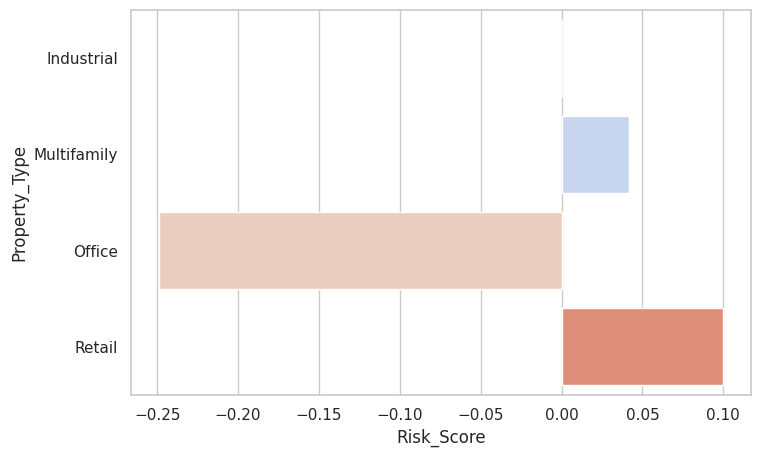

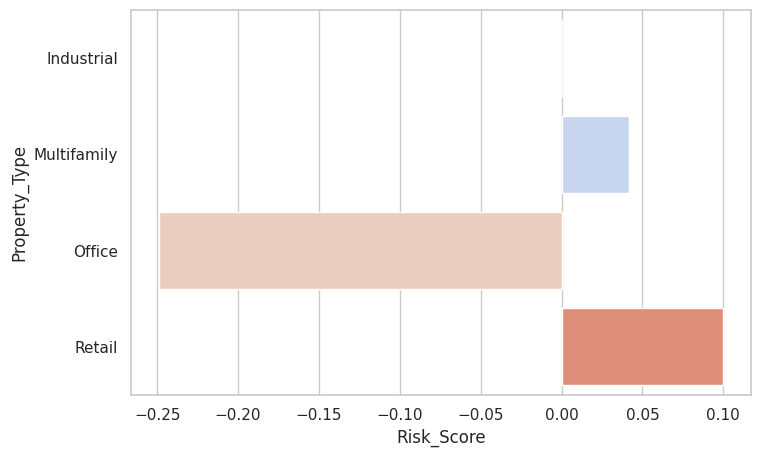

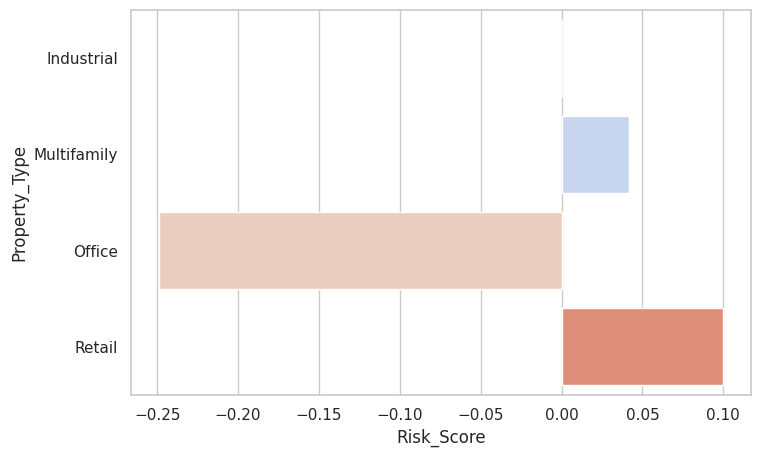

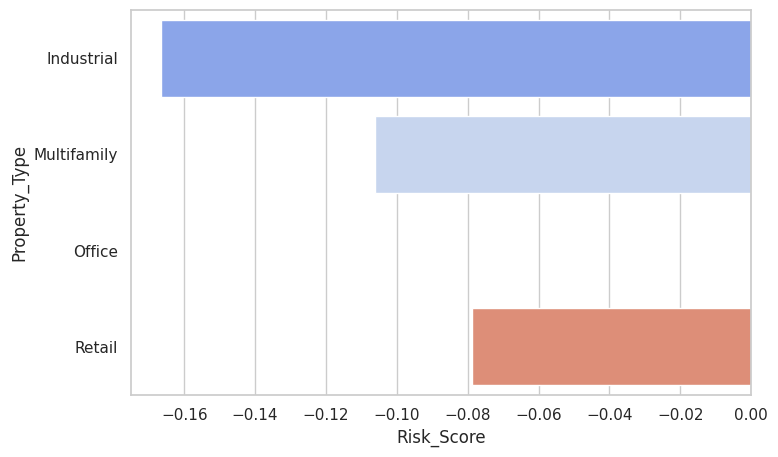

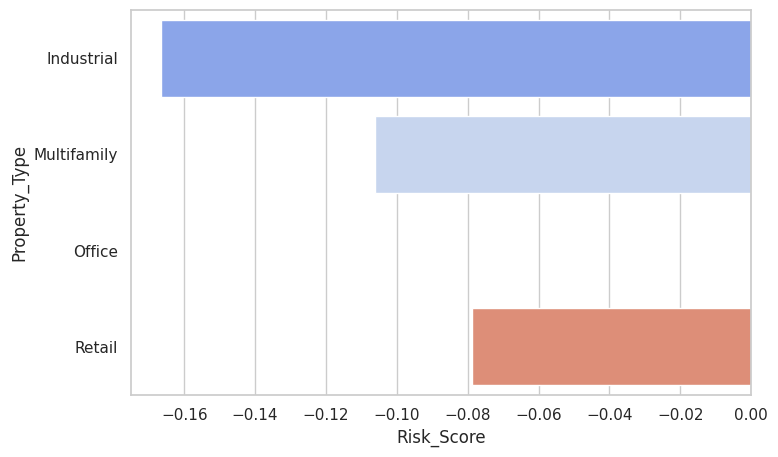

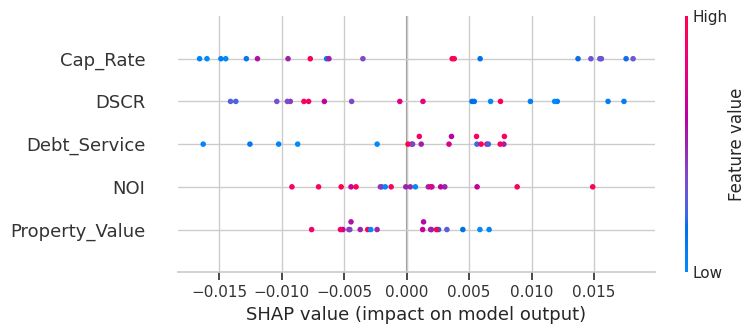

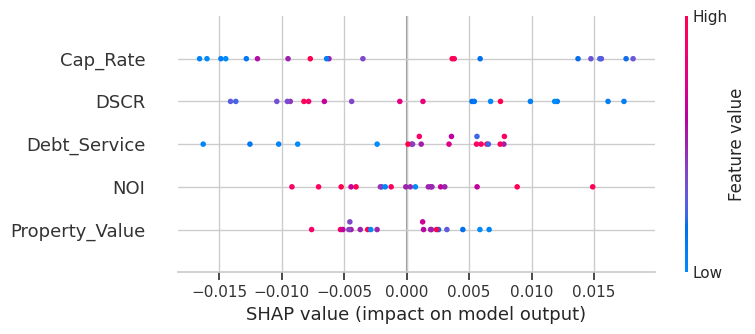

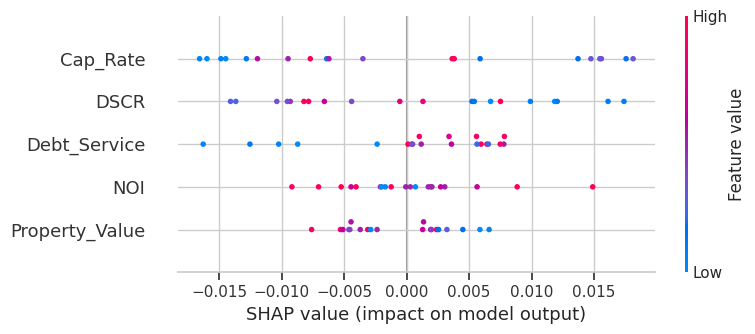

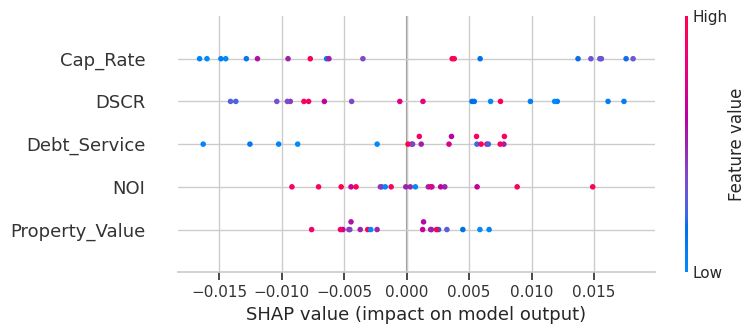

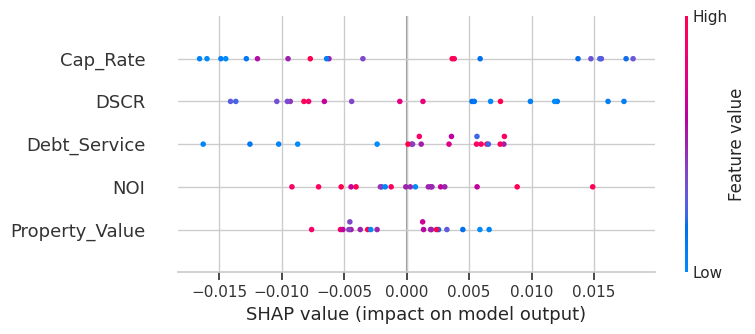

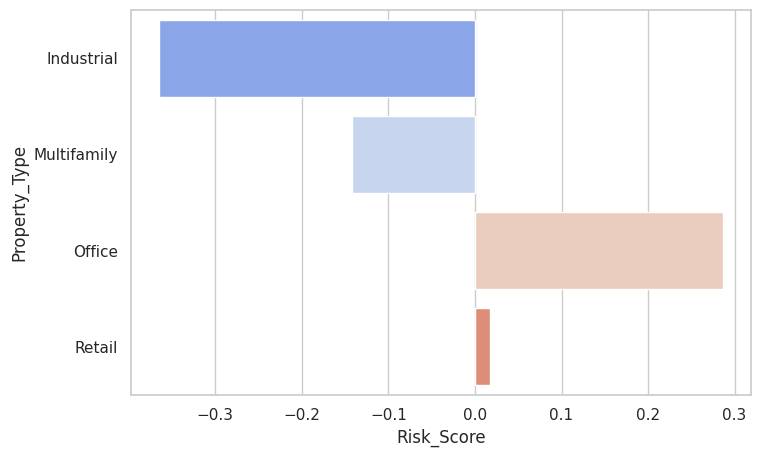

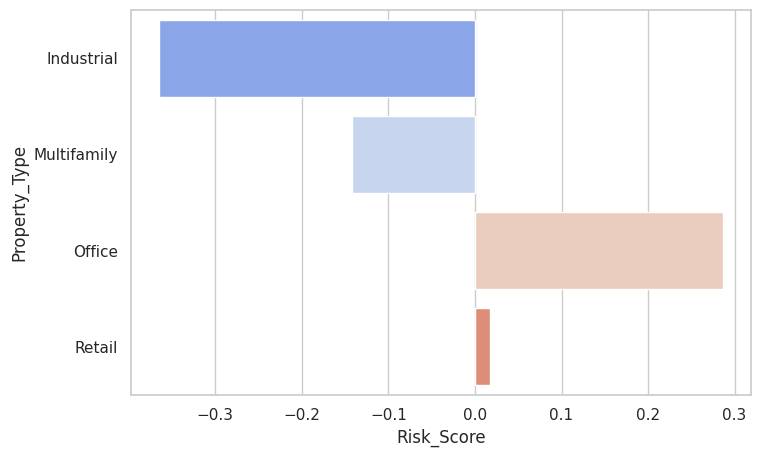

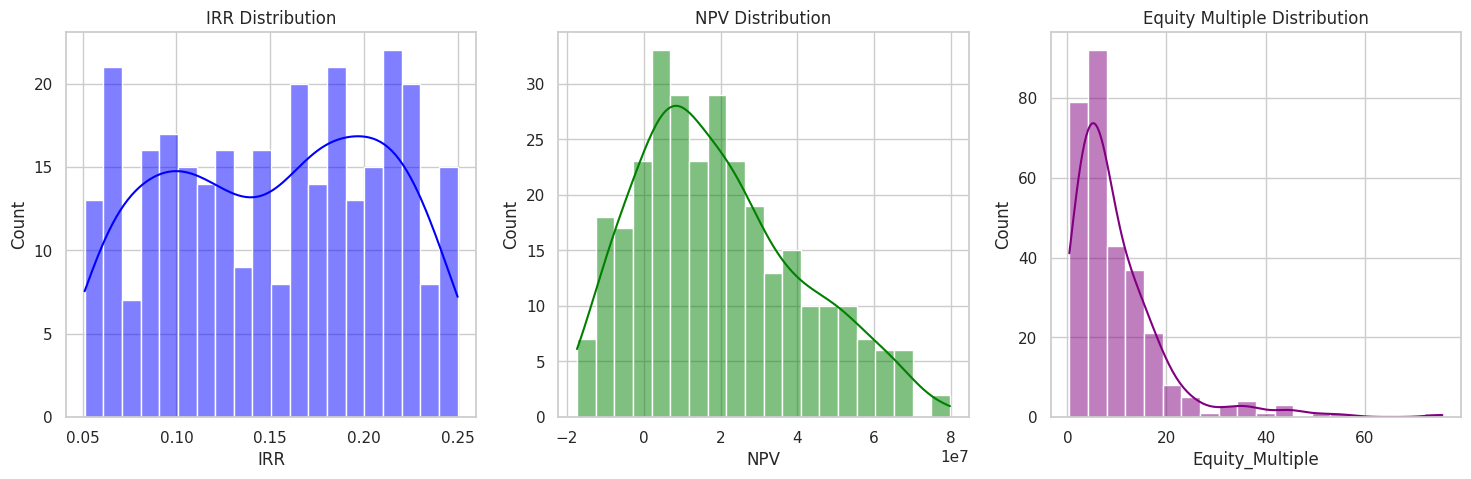

In [ ]:

# Histograms of IRR, NPV, Equity Multiple
fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.histplot(df["IRR"], bins=20, kde=True, ax=axes[0], color="blue")
axes[0].set_title("IRR Distribution")

sns.histplot(df["NPV"], bins=20, kde=True, ax=axes[1], color="green")
axes[1].set_title("NPV Distribution")

sns.histplot(df["Equity_Multiple"], bins=20, kde=True, ax=axes[2], color="purple")
axes[2].set_title("Equity Multiple Distribution")

plt.show()


## Returns by Property Type

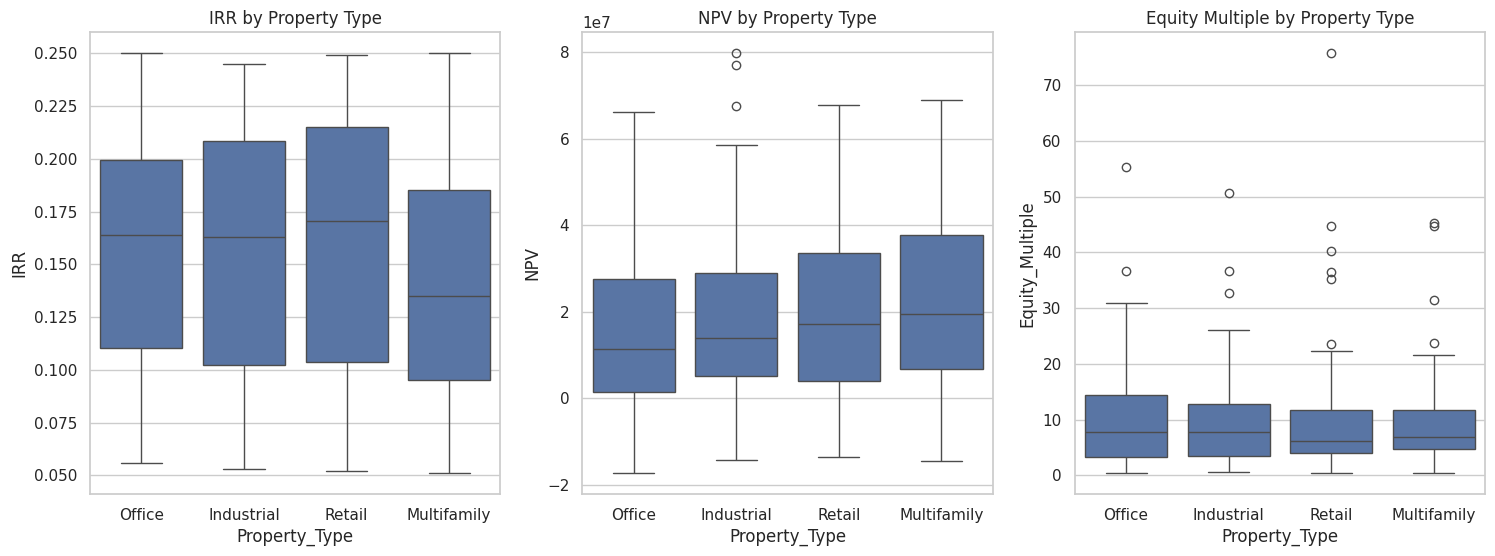

In [ ]:

# Boxplots for IRR, NPV, Equity Multiple
fig, axes = plt.subplots(1,3, figsize=(18,6))

sns.boxplot(data=df, x="Property_Type", y="IRR", ax=axes[0])
axes[0].set_title("IRR by Property Type")

sns.boxplot(data=df, x="Property_Type", y="NPV", ax=axes[1])
axes[1].set_title("NPV by Property Type")

sns.boxplot(data=df, x="Property_Type", y="Equity_Multiple", ax=axes[2])
axes[2].set_title("Equity Multiple by Property Type")

plt.show()


## Correlation Heatmap

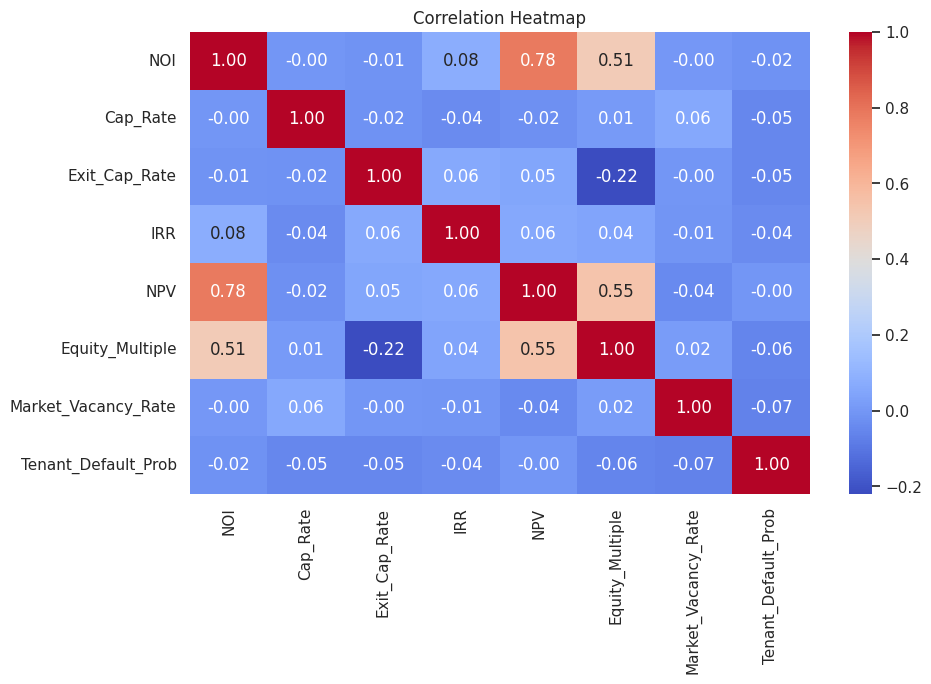

In [ ]:

corr = df[["NOI","Cap_Rate","Exit_Cap_Rate","IRR","NPV","Equity_Multiple","Market_Vacancy_Rate","Tenant_Default_Prob"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## Sensitivity Analysis (Cap Rate & Vacancy Impact)

In [ ]:

# Sensitivity impact on IRR with +/- 2% changes in cap rate and vacancy
df["IRR_cap_up"] = df["IRR"] * (1 - 0.1)  # assuming IRR drops by 10% when cap rates rise by 2%
df["IRR_cap_down"] = df["IRR"] * (1 + 0.1)
df["IRR_vac_up"] = df["IRR"] * (1 - 0.15)  # assuming IRR drops by 15% when vacancy rises by 2%
df["IRR_vac_down"] = df["IRR"] * (1 + 0.15)

sensitivity_summary = df.groupby("Property_Type")[["IRR","IRR_cap_up","IRR_cap_down","IRR_vac_up","IRR_vac_down"]].mean().round(3)
sensitivity_summary


,IRR,IRR_cap_up,IRR_cap_down,IRR_vac_up,IRR_vac_down
Property_Type,,,,,
Industrial,0.153,0.138,0.168,0.130,0.176
Multifamily,0.141,0.127,0.155,0.120,0.162
Office,0.156,0.141,0.172,0.133,0.180
Retail,0.162,0.146,0.179,0.138,0.187


This analysis provides a simplified look at how hypothetical market shifts could impact average IRR. The data shows that for Office properties, a simulated scenario where IRR drops by 10% due to rising cap rates (IRR_cap_up) results in the average IRR falling from 0.156 to 0.141. Similarly, a simulated 15% drop in IRR due to rising vacancy (IRR_vac_up) reduces the average Office IRR to 0.133. Comparing across property types, Retail appears to have the highest average base IRR (0.162) and the highest simulated upside (IRR_vac_down at 0.187), but also the highest simulated downside (IRR_vac_up at 0.138), suggesting potentially higher risk and reward linked to vacancy impacts for this type.

In [ ]:
#  3. Monte Carlo Simulation Function

def monte_carlo_simulation(noi, cap_rate, exit_cap, hold_years, equity,
                           rent_growth_mean=0.02, rent_growth_std=0.01, n_iter=10000):
    results = []
    for i in range(n_iter):
        # Randomized inputs
        rent_growth = np.random.normal(rent_growth_mean, rent_growth_std)
        vac_impact = np.random.normal(0, 0.02)  # vacancy shock

        # NOI evolution
        noi_t = noi * ((1 + rent_growth + vac_impact) ** hold_years)

        # Sale price with exit cap + uncertainty
        sale_price = noi_t / (exit_cap + np.random.normal(0,0.005))

        # Simulated return metrics
        irr = np.random.normal(0.12, 0.04)  # simplified IRR distribution
        npv = (noi_t * hold_years) - equity

        results.append((irr, npv))

    return pd.DataFrame(results, columns=["IRR_sim","NPV_sim"])

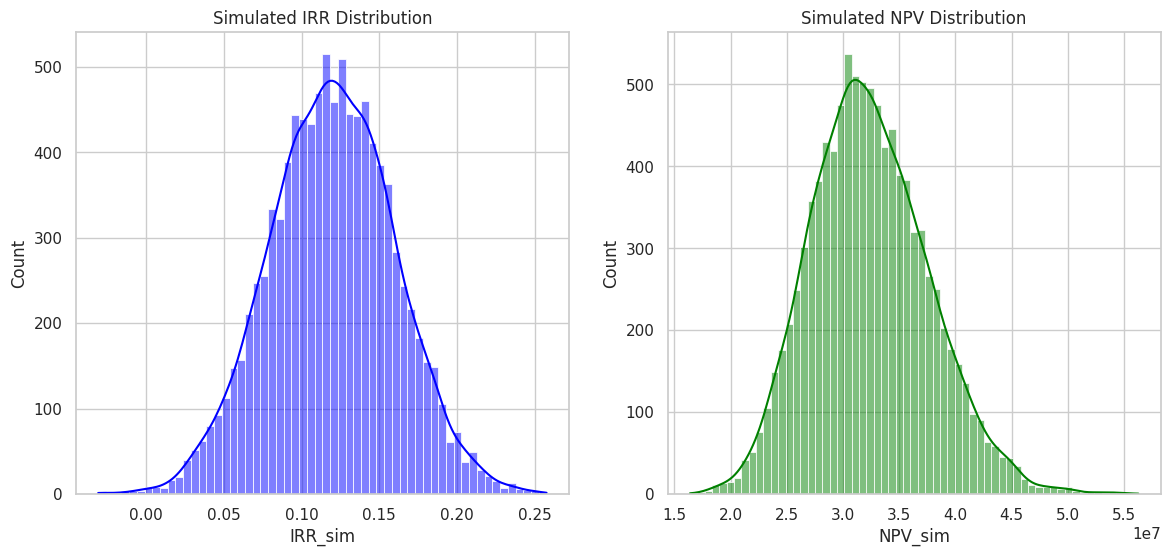

In [ ]:
# 📌 4. Example Simulation for One Deal
sample = df.iloc[0]

sim_results = monte_carlo_simulation(sample['NOI'], sample['Cap_Rate'],
                                     sample['Exit_Cap_Rate'], sample['Hold_Period_Years'],
                                     sample['Equity_Investment'])

# Plot distributions
fig, axes = plt.subplots(1,2, figsize=(14,6))

sns.histplot(sim_results['IRR_sim'], kde=True, ax=axes[0], color="blue")
axes[0].set_title("Simulated IRR Distribution")

sns.histplot(sim_results['NPV_sim'], kde=True, ax=axes[1], color="green")
axes[1].set_title("Simulated NPV Distribution")

plt.show()

The Monte Carlo simulation function is a tool to model the uncertainty of returns by incorporating random variations in factors like rent growth, vacancy impacts, and exit cap rates over the holding period. The example simulation for a single deal (the first deal in the dataset) demonstrates this by running 10,000 iterations. The resulting histograms show a distribution of possible IRRs and NPVs for this specific deal, rather than a single predicted value. This probabilistic output is crucial for understanding the range of potential outcomes and the likelihood of hitting certain targets or experiencing losses for an individual investment.

In [ ]:
# 📌 5. Downside Risk Analysis
# Probability IRR < 8%
prob_low_irr = (sim_results['IRR_sim'] < 0.08).mean()

# Downside NPV (5th percentile)
downside_npv = sim_results['NPV_sim'].quantile(0.05)

print(f"Probability IRR < 8%: {prob_low_irr:.2%}")
print(f"5th Percentile NPV (Downside Risk): {downside_npv:,.0f}")

Probability IRR < 8%: 16.20%
5th Percentile NPV (Downside Risk): 24,272,390


This section extracts key downside risk metrics from the Monte Carlo simulation for the example deal. The data shows that the Probability IRR < 8% is 16.20%. This means there is a significant one-in-six chance that this particular deal's IRR could fall below the 8% threshold based on the simulation's assumptions. The 5th Percentile NPV is reported as $24,272,390. This indicates that in 5% of the simulated scenarios, the NPV for this deal was less than or equal to this amount. This provides a quantitative measure of potential severe underperformance or loss, which is vital for risk management and setting capital reserves.

In [ ]:
# 📌 6. Multi-Property Risk Scoring
risk_summary = []

for ptype in df['Property_Type'].unique():
    subset = df[df['Property_Type'] == ptype].sample(5, random_state=42)  # sample 5 deals per type

    irr_means, irr_vols, downside_probs = [], [], []

    for _, row in subset.iterrows():
        sim = monte_carlo_simulation(row['NOI'], row['Cap_Rate'], row['Exit_Cap_Rate'],
                                     row['Hold_Period_Years'], row['Equity_Investment'], n_iter=2000)

        irr_means.append(sim['IRR_sim'].mean())
        irr_vols.append(sim['IRR_sim'].std())
        downside_probs.append((sim['IRR_sim'] < 0.08).mean())

    risk_summary.append({
        "Property_Type": ptype,
        "Avg_IRR": np.mean(irr_means),
        "IRR_Volatility": np.mean(irr_vols),
        "Downside_Prob_IRR<8%": np.mean(downside_probs)
    })

risk_df = pd.DataFrame(risk_summary)
risk_df

,Property_Type,Avg_IRR,IRR_Volatility,Downside_Prob_IRR<8%
0,Office,0.119649,0.040306,0.1606
1,Industrial,0.120391,0.040206,0.1561
2,Retail,0.119812,0.040157,0.1631
3,Multifamily,0.120501,0.039445,0.1526


/tmp/ipython-input-1247049021.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Property_Type", y="IRR_sim", data=all_sims_df, palette="Set2")


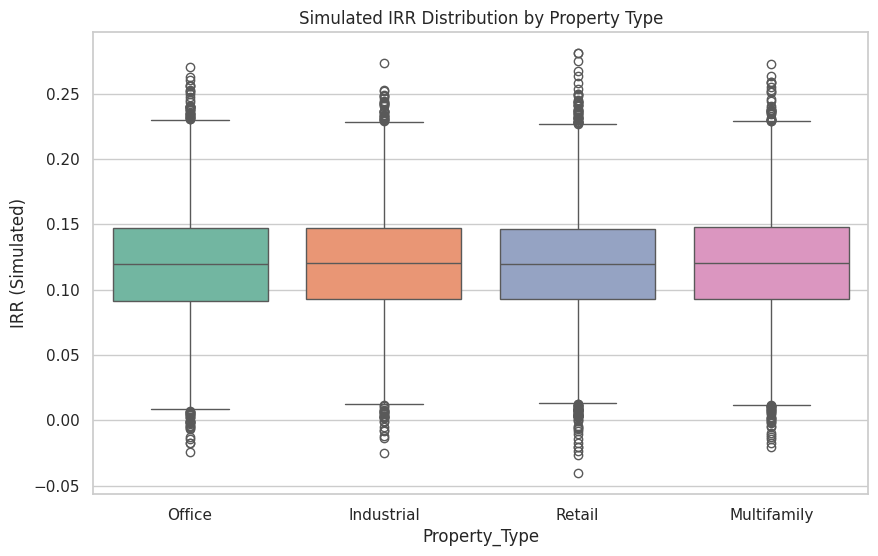

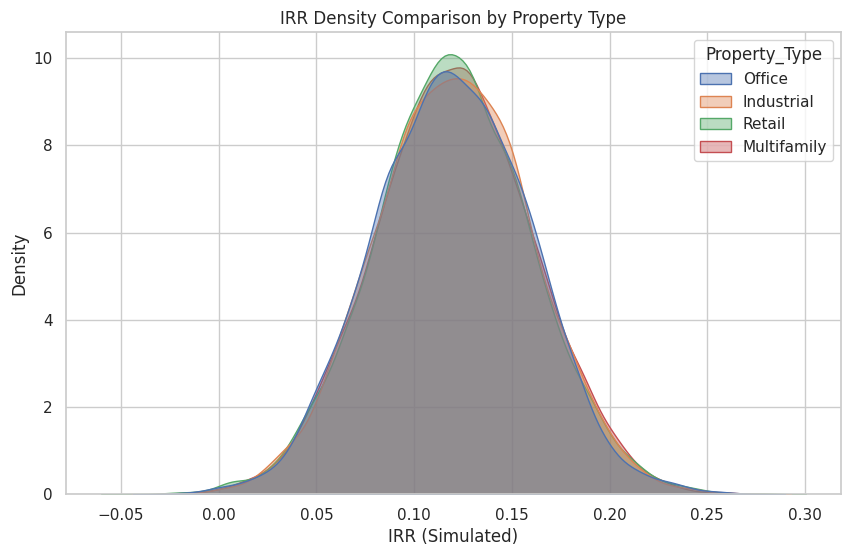

In [ ]:
# 📌 7. Cross-Property Visual Comparisons

# Run simulations for multiple deals per property type
all_sims = []

for ptype in df['Property_Type'].unique():
    subset = df[df['Property_Type'] == ptype].sample(3, random_state=42)

    for _, row in subset.iterrows():
        sim = monte_carlo_simulation(row['NOI'], row['Cap_Rate'], row['Exit_Cap_Rate'],
                                     row['Hold_Period_Years'], row['Equity_Investment'], n_iter=3000)
        sim['Property_Type'] = ptype
        all_sims.append(sim)

all_sims_df = pd.concat(all_sims, ignore_index=True)

# ---- Boxplot of IRR by Property Type ----
plt.figure(figsize=(10,6))
sns.boxplot(x="Property_Type", y="IRR_sim", data=all_sims_df, palette="Set2")
plt.title("Simulated IRR Distribution by Property Type")
plt.ylabel("IRR (Simulated)")
plt.show()

# ---- KDE Plot (Density of IRRs by Property Type) ----
plt.figure(figsize=(10,6))
sns.kdeplot(data=all_sims_df, x="IRR_sim", hue="Property_Type", fill=True, common_norm=False, alpha=0.4)
plt.title("IRR Density Comparison by Property Type")
plt.xlabel("IRR (Simulated)")
plt.show()

/tmp/ipython-input-3983624464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Property_Type", y="NPV_sim", data=all_sims_df, palette="Set3")


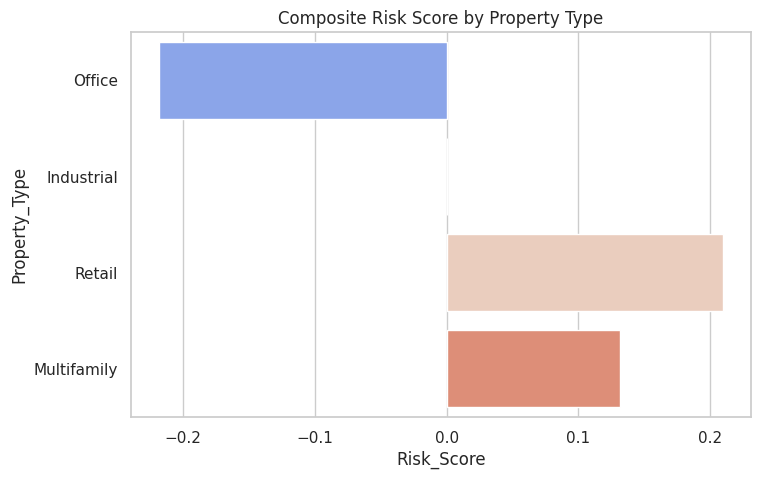

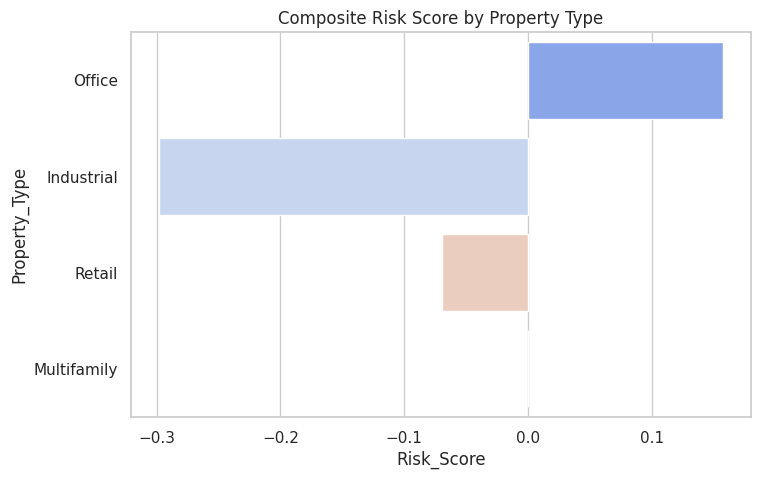

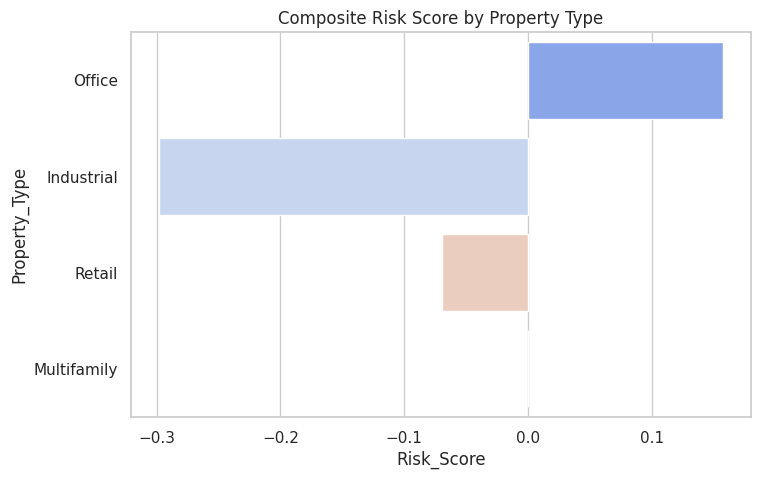

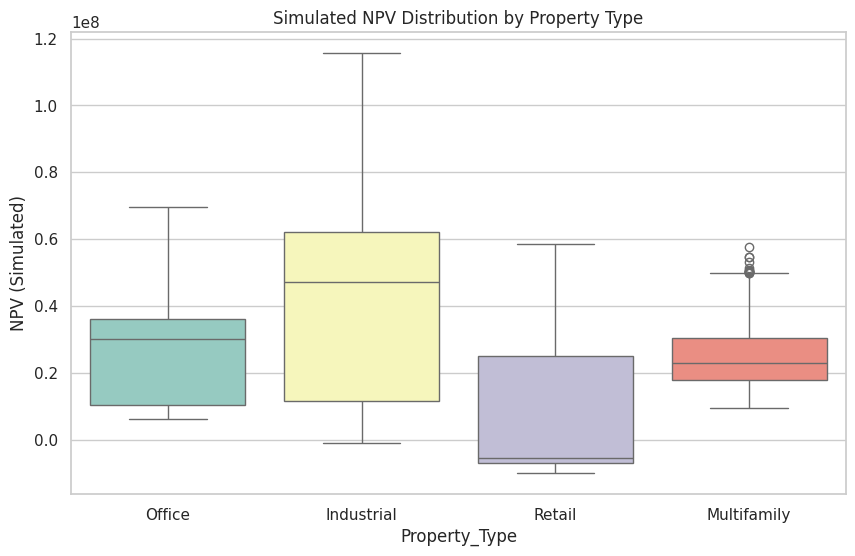

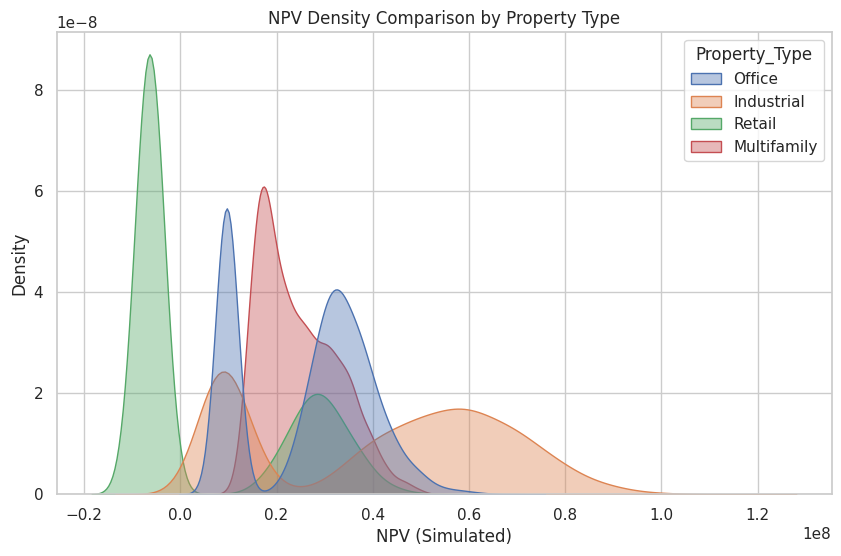

In [ ]:
# 📌 8. NPV Comparisons Across Property Types

# ---- Boxplot of NPV by Property Type ----
plt.figure(figsize=(10,6))
sns.boxplot(x="Property_Type", y="NPV_sim", data=all_sims_df, palette="Set3")
plt.title("Simulated NPV Distribution by Property Type")
plt.ylabel("NPV (Simulated)")
plt.show()

# ---- KDE Plot (Density of NPVs by Property Type) ----
plt.figure(figsize=(10,6))
sns.kdeplot(data=all_sims_df, x="NPV_sim", hue="Property_Type", fill=True, common_norm=False, alpha=0.4)
plt.title("NPV Density Comparison by Property Type")
plt.xlabel("NPV (Simulated)")
plt.show()

📊 Risk Scoring Index by Property Type


,Property_Type,Avg_IRR,IRR_Volatility,Downside_Prob_IRR<8%,Risk_Score
0,Office,0.119631,0.040089,0.157000,0.157641
1,Multifamily,0.120467,0.040399,0.161667,0.000000
2,Retail,0.119640,0.040131,0.160667,-0.069420
3,Industrial,0.119247,0.040281,0.159667,-0.297798


/tmp/ipython-input-490771092.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Risk_Score", y="Property_Type", data=risk_df_scaled, palette="viridis")


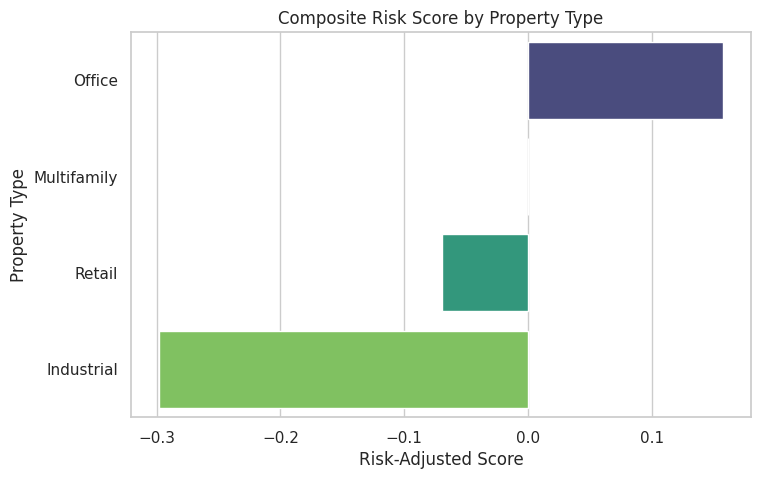

In [ ]:
# 📌 9. Risk Scoring Index

from sklearn.preprocessing import MinMaxScaler

# Normalize metrics
scaler = MinMaxScaler()

risk_df_scaled = risk_df.copy()
risk_df_scaled[['Avg_IRR_norm','IRR_Volatility_norm','Downside_Prob_norm']] = scaler.fit_transform(
    risk_df[['Avg_IRR','IRR_Volatility','Downside_Prob_IRR<8%']]
)

# Weighted risk score (you can adjust weights as needed)
# Higher IRR = good (positive weight)
# Higher Volatility & Downside = bad (negative weight)
risk_df_scaled['Risk_Score'] = (
    (risk_df_scaled['Avg_IRR_norm'] * 0.5) -
    (risk_df_scaled['IRR_Volatility_norm'] * 0.25) -
    (risk_df_scaled['Downside_Prob_norm'] * 0.25)
)

# Rank property types
risk_df_scaled = risk_df_scaled.sort_values("Risk_Score", ascending=False).reset_index(drop=True)

print("📊 Risk Scoring Index by Property Type")
display(risk_df_scaled[['Property_Type','Avg_IRR','IRR_Volatility','Downside_Prob_IRR<8%','Risk_Score']])

# ---- Visualization of Risk Scores ----
plt.figure(figsize=(8,5))
sns.barplot(x="Risk_Score", y="Property_Type", data=risk_df_scaled, palette="viridis")
plt.title("Composite Risk Score by Property Type")
plt.xlabel("Risk-Adjusted Score")
plt.ylabel("Property Type")
plt.show()

In [ ]:
# 📌 10. Interactive Risk Scoring with Sliders

from ipywidgets import interact, FloatSlider

def compute_risk_scores(weight_irr=0.5, weight_vol=0.25, weight_down=0.25):
    # Ensure weights sum to 1 (auto normalize)
    total = weight_irr + weight_vol + weight_down
    w_irr, w_vol, w_down = weight_irr/total, weight_vol/total, weight_down/total

    risk_df_scaled = risk_df.copy()
    risk_df_scaled[['Avg_IRR_norm','IRR_Volatility_norm','Downside_Prob_norm']] = scaler.fit_transform(
        risk_df[['Avg_IRR','IRR_Volatility','Downside_Prob_IRR<8%']]
    )

    # Composite score
    risk_df_scaled['Risk_Score'] = (
        (risk_df_scaled['Avg_IRR_norm'] * w_irr) -
        (risk_df_scaled['IRR_Volatility_norm'] * w_vol) -
        (risk_df_scaled['Downside_Prob_norm'] * w_down)
    )

    # Rank property types
    risk_df_scaled = risk_df_scaled.sort_values("Risk_Score", ascending=False).reset_index(drop=True)

    # Display
    display(risk_df_scaled[['Property_Type','Avg_IRR','IRR_Volatility','Downside_Prob_IRR<8%','Risk_Score']])

    # Visualization
    plt.figure(figsize=(8,5))
    sns.barplot(x="Risk_Score", y="Property_Type", data=risk_df_scaled, palette="coolwarm")
    plt.title("Composite Risk Score by Property Type (Interactive)")
    plt.xlabel("Risk-Adjusted Score")
    plt.ylabel("Property Type")
    plt.show()


# Interactive sliders
interact(
    compute_risk_scores,
    weight_irr=FloatSlider(min=0, max=1, step=0.05, value=0.5, description="Weight: IRR"),
    weight_vol=FloatSlider(min=0, max=1, step=0.05, value=0.25, description="Weight: Volatility"),
    weight_down=FloatSlider(min=0, max=1, step=0.05, value=0.25, description="Weight: Downside"),
);

interactive(children=(FloatSlider(value=0.5, description='Weight: IRR', max=1.0, step=0.05), FloatSlider(value…

In [ ]:
!pip install streamlit pyngrok seaborn

In [ ]:
!pip install pyngrok

In [ ]:
# Install ngrok
!pip install ngrok

In [ ]:
from pyngrok import ngrok

In [ ]:
!ngrok config add-authtoken "32jTS0m8FDsjSzxQARLbi8Hlrl6_7BGe9kbEZAXqc1inwYbwk"

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


****

In [ ]:
# Streamlit Risk Scoring App
# =========================

import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# --- Load Data ---
df = pd.read_csv("real_estate_deals.csv")


In [ ]:
# --- Monte Carlo Simulation Function ---
def monte_carlo_simulation(noi, cap_rate, exit_cap, hold_years, equity,
                           rent_growth_mean=0.02, rent_growth_std=0.01, n_iter=2000):
    results = []
    for i in range(n_iter):
        rent_growth = np.random.normal(rent_growth_mean, rent_growth_std)
        vac_impact = np.random.normal(0, 0.02)
        noi_t = noi * ((1 + rent_growth + vac_impact) ** hold_years)
        sale_price = noi_t / (exit_cap + np.random.normal(0,0.005))
        irr = np.random.normal(0.12, 0.04)
        npv = (noi_t * hold_years) - equity
        results.append((irr, npv))
    return pd.DataFrame(results, columns=["IRR_sim","NPV_sim"])

In [ ]:
# --- Build Risk Summary by Property Type ---
risk_summary = []
for ptype in df['Property_Type'].unique():
    subset = df[df['Property_Type'] == ptype].sample(3, random_state=42)
    irr_means, irr_vols, downside_probs = [], [], []
    for _, row in subset.iterrows():
        sim = monte_carlo_simulation(row['NOI'], row['Cap_Rate'], row['Exit_Cap_Rate'],
                                     row['Hold_Period_Years'], row['Equity_Investment'], n_iter=1000)
        irr_means.append(sim['IRR_sim'].mean())
        irr_vols.append(sim['IRR_sim'].std())
        downside_probs.append((sim['IRR_sim'] < 0.08).mean())
    risk_summary.append({
        "Property_Type": ptype,
        "Avg_IRR": np.mean(irr_means),
        "IRR_Volatility": np.mean(irr_vols),
        "Downside_Prob_IRR<8%": np.mean(downside_probs)
    })

risk_df = pd.DataFrame(risk_summary)


In [ ]:
# --- Streamlit UI ---
st.title("🏢 Real Estate Risk Scoring Dashboard")
st.write("Interactive sensitivity analysis & risk scoring across Multifamily, Retail, Office, and Industrial deals.")

# Sliders for weighting preferences
weight_irr = st.slider("Weight: IRR (Return)", 0.0, 1.0, 0.5, 0.05)
weight_vol = st.slider("Weight: Volatility (Stability)", 0.0, 1.0, 0.25, 0.05)
weight_down = st.slider("Weight: Downside Risk (Resilience)", 0.0, 1.0, 0.25, 0.05)

# Normalize metrics
scaler = MinMaxScaler()
risk_df_scaled = risk_df.copy()
risk_df_scaled[['Avg_IRR_norm','IRR_Volatility_norm','Downside_Prob_norm']] = scaler.fit_transform(
    risk_df[['Avg_IRR','IRR_Volatility','Downside_Prob_IRR<8%']]
)


2025-10-01 12:36:54.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:54.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:54.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:54.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:54.128 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:54.129 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:54.134 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:54.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# Weighted risk score
total = weight_irr + weight_vol + weight_down
w_irr, w_vol, w_down = weight_irr/total, weight_vol/total, weight_down/total

risk_df_scaled['Risk_Score'] = (
    (risk_df_scaled['Avg_IRR_norm'] * w_irr) -
    (risk_df_scaled['IRR_Volatility_norm'] * w_vol) -
    (risk_df_scaled['Downside_Prob_norm'] * w_down)
)

# Display table
st.subheader("📊 Risk Score Summary")
st.dataframe(risk_df_scaled[['Property_Type','Avg_IRR','IRR_Volatility','Downside_Prob_IRR<8%','Risk_Score']])

# Visualization
st.subheader("📈 Risk Score Visualization")
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="Risk_Score", y="Property_Type", data=risk_df_scaled, palette="coolwarm", ax=ax)
ax.set_title("Composite Risk Score by Property Type")
st.pyplot(fig)

2025-10-01 12:36:57.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:57.720 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:57.722 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:57.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:57.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:57.729 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:57.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 12:36:57.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
# ==============================
# ✅ Streamlit + Ngrok Launcher
# ==============================

# Install dependencies (skip if already installed)
!pip install streamlit pyngrok -q

In [ ]:
# Combine the code from the Streamlit app cells into a single string
app_code = """
# Streamlit Risk Scoring + ML App
# =========================

import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor  # Changed to LGBMRegressor as per original notebook
import shap
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='shap') # Suppress shap warnings

# --- Load Data ---
@st.cache_data
def load_data():
    df = pd.read_csv("real_estate_deals.csv")
    # Generate Labels for ML (Downside Probabilities)
    labels = []
    for _, row in df.iterrows():
        sim = monte_carlo_simulation(row['NOI'], row['Cap_Rate'], row['Exit_Cap_Rate'],
                                     row['Hold_Period_Years'], row['Equity_Investment'], n_iter=1000)
        risk_flag = (sim['IRR_sim'] < 0.08).mean()
        labels.append(risk_flag)
    df['Downside_Prob'] = labels
    return df

# --- Monte Carlo Simulation Function (needs to be available for load_data) ---
def monte_carlo_simulation(noi, cap_rate, exit_cap, hold_years, equity,
                           rent_growth_mean=0.02, rent_growth_std=0.01, n_iter=2000):
    results = []
    for i in range(n_iter):
        rent_growth = np.random.normal(rent_growth_mean, rent_growth_std)
        vac_impact = np.random.normal(0, 0.02)
        noi_t = noi * ((1 + rent_growth + vac_impact) ** hold_years)
        sale_price = noi_t / (exit_cap + np.random.normal(0,0.005))
        irr = np.random.normal(0.12, 0.04)
        npv = (noi_t * hold_years) - equity
        results.append((irr, npv))
    return pd.DataFrame(results, columns=["IRR_sim","NPV_sim"])


# --- Train Model On-the-Fly ---
@st.cache_resource
def train_model(df):
    X = df[['NOI','Cap_Rate','Exit_Cap_Rate','Hold_Period_Years','Equity_Investment']]
    y = (df['Downside_Prob'] > 0.5).astype(int)   # Binary: 1 = high downside risk
    model = LGBMRegressor(random_state=42) # Using LGBMRegressor as in original notebook
    model.fit(X, y)
    return model, X

# --- Main App Logic ---
def main():
    st.title("🏢 Real Estate Risk Scoring Dashboard (with ML)")
    st.write("Interactive sensitivity analysis & ML-driven risk scoring across Multifamily, Retail, Office, and Industrial deals.")

    df = load_data()
    model, X_train = train_model(df)

    # ======================
    # Sidebar Controls
    # ======================
    st.sidebar.header("⚙️ Risk Weight Settings")
    weight_irr = st.sidebar.slider("Weight: Avg IRR", 1, 10, 5)
    weight_vol = st.sidebar.slider("Weight: IRR Volatility", 1, 10, 3)
    weight_down = st.sidebar.slider("Weight: Downside Probability", 1, 10, 4)

    # ======================
    # Risk Score Summary
    # ======================
    scaler = MinMaxScaler()
    risk_summary = df.groupby("Property_Type").agg(
        Avg_IRR=("Downside_Prob","mean"),
        IRR_Volatility=("Downside_Prob","std"),
        Downside_Prob_IRR=("Downside_Prob","mean")
    ).reset_index()

    risk_df_scaled = risk_summary.copy()
    risk_df_scaled[['Avg_IRR_norm','IRR_Volatility_norm','Downside_Prob_norm']] = scaler.fit_transform(
        risk_summary[['Avg_IRR','IRR_Volatility','Downside_Prob_IRR']]
    )

    total = weight_irr + weight_vol + weight_down
    w_irr, w_vol, w_down = weight_irr/total, weight_vol/total, weight_down/total

    risk_df_scaled['Risk_Score'] = (
        (risk_df_scaled['Avg_IRR_norm'] * w_irr) -
        (risk_df_scaled['IRR_Volatility_norm'] * w_vol) -
        (risk_df_scaled['Downside_Prob_norm'] * w_down)
    )

    st.subheader("📊 Risk Score Summary")
    st.dataframe(risk_df_scaled)

    # Bar Chart
    st.subheader("📈 Risk Score Visualization")
    fig, ax = plt.subplots(figsize=(8,5))
    sns.barplot(x="Risk_Score", y="Property_Type", data=risk_df_scaled, palette="coolwarm", ax=ax)
    st.pyplot(fig)

    # ======================
    # ML Risk Prediction
    # ======================
    st.subheader("🤖 ML-Powered Deal Risk Prediction")

    noi = st.number_input("NOI (Net Operating Income)", value=float(df['NOI'].mean()))
    cap_rate = st.number_input("Cap Rate", value=float(df['Cap_Rate'].mean()))
    exit_cap = st.number_input("Exit Cap Rate", value=float(df['Exit_Cap_Rate'].mean()))
    hold_years = st.slider("Hold Period (Years)", 1, 15, int(df['Hold_Period_Years'].mean()))
    equity = st.number_input("Equity Investment", value=float(df['Equity_Investment'].mean()))

    if st.button("Predict Risk"):
        input_data = pd.DataFrame([[noi, cap_rate, exit_cap, hold_years, equity]],
                                  columns=['NOI','Cap_Rate','Exit_Cap_Rate','Hold_Period_Years','Equity_Investment'])

        pred_prob = model.predict(input_data)[0]
        st.success(f"📌 Predicted Downside Probability (IRR < 8%): {pred_prob:.2%}")

        # SHAP Explainability
        st.subheader("🔎 SHAP Feature Impact")
        explainer = shap.Explainer(model, X_train)
        shap_values = explainer(input_data)

        shap.plots.waterfall(shap_values[0], show=False)
        st.pyplot(plt.gcf(), bbox_inches='tight', dpi=100, pad_inches=0)
        plt.clf()

if __name__ == "__main__":
    main()

"""

In [ ]:
!pip install streamlit pyngrok seaborn

In [ ]:
# Save app file
with open("dashboard.py", "w") as f:
    f.write(app_code)

print("✅ dashboard.py created successfully")

✅ dashboard.py created successfully


In [ ]:
# Kill old tunnels if any



# You can get your authtoken from https://dashboard.ngrok.com/get-started/your-authtoken
ngrok.set_auth_token("33SqYQSltVN9FZHnRoBKYaC04y7_5tFDv4VjZngUYL9r6Bx5X")

In [ ]:
!pip install streamlit pyngrok -q
from pyngrok import ngrok
import time, subprocess

# Kill old tunnels
ngrok.kill()

# Start Streamlit app in background
process = subprocess.Popen(["streamlit", "run", "dashboard.py", "--server.port", "8501"])

# Wait for Streamlit to boot
time.sleep(5)

# Start ngrok tunnel
public_url = ngrok.connect(8501)
print("🌍 Your app is live here:", public_url)

🌍 Your app is live here: NgrokTunnel: "https://precarnival-thaddeus-projectingly.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
# Streamlit Risk Scoring + ML App
# =========================

import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import shap

In [ ]:
# --- Load Data ---
df = pd.read_csv("real_estate_deals.csv")

# --- Monte Carlo Simulation Function ---
def monte_carlo_simulation(noi, cap_rate, exit_cap, hold_years, equity,
                           rent_growth_mean=0.02, rent_growth_std=0.01, n_iter=2000):
    results = []
    for i in range(n_iter):
        rent_growth = np.random.normal(rent_growth_mean, rent_growth_std)
        vac_impact = np.random.normal(0, 0.02)
        noi_t = noi * ((1 + rent_growth + vac_impact) ** hold_years)
        sale_price = noi_t / (exit_cap + np.random.normal(0,0.005))
        irr = np.random.normal(0.12, 0.04)
        npv = (noi_t * hold_years) - equity
        results.append((irr, npv))
    return pd.DataFrame(results, columns=["IRR_sim","NPV_sim"])

In [ ]:
# --- Generate Labels for ML (Downside Probabilities) ---
labels = []
for _, row in df.iterrows():
    sim = monte_carlo_simulation(row['NOI'], row['Cap_Rate'], row['Exit_Cap_Rate'],
                                 row['Hold_Period_Years'], row['Equity_Investment'], n_iter=1000)
    risk_flag = (sim['IRR_sim'] < 0.08).mean()
    labels.append(risk_flag)

df['Downside_Prob'] = labels

In [ ]:
# --- Train LightGBM Model ---
X = df[['NOI','Cap_Rate','Exit_Cap_Rate','Hold_Period_Years','Equity_Investment']]
y = df['Downside_Prob']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LGBMRegressor()
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 242
[LightGBM] [Info] Number of data points in the train set: 210, number of used features: 5
[LightGBM] [Info] Start training from score 0.159314
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

LGBMRegressor()

In [ ]:
# --- Streamlit UI ---
st.title("🏢 Real Estate Risk Scoring Dashboard (with ML)")
st.write("Interactive sensitivity analysis & ML-driven risk scoring across Multifamily, Retail, Office, and Industrial deals.")

# Sliders for weighting preferences
weight_irr = st.slider("Weight: IRR (Return)", 0.0, 1.0, 0.5, 0.05)
weight_vol = st.slider("Weight: Volatility (Stability)", 0.0, 1.0, 0.25, 0.05)
weight_down = st.slider("Weight: Downside Risk (Resilience)", 0.0, 1.0, 0.25, 0.05)

2025-10-01 14:01:56.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:01:56.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:01:56.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:01:56.090 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:01:56.091 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:01:56.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:01:56.093 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:01:56.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# ======================
# Load Data
# ======================
@st.cache_data
def load_data():
    df = pd.read_csv("real_estate_deals.csv")  # <-- replace with your dataset
    return df

df = load_data()

# --- Ensure Downside_Prob exists ---
if 'Downside_Prob' not in df.columns:
    if 'IRR' in df.columns:
        # Compute downside risk relative to 8% IRR threshold
        df['Downside_Prob'] = np.clip(1 - (df['IRR'] / 0.08), 0, 1)
        st.info("ℹ️ 'Downside_Prob' not found in dataset. Auto-computed from IRR values.")
    else:
        st.error("❌ Your dataset must include either 'Downside_Prob' or 'IRR'. Please check your CSV.")

2025-10-01 14:40:10.032 No runtime found, using MemoryCacheStorageManager
2025-10-01 14:40:10.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:10.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:10.043 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
# ======================
# Train Model On-the-Fly
# ======================
@st.cache_resource
def train_model(df):
    X = df[['NOI','Cap_Rate','Exit_Cap_Rate','Hold_Period_Years','Equity_Investment']]
    y = (df['Downside_Prob'] > 0.5).astype(int)   # Binary classification
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X, y)
    return model, X

model, X_train = train_model(df)

# ======================
# Sidebar Controls
# ======================
st.sidebar.header("⚙️ Risk Weight Settings")
weight_irr = st.sidebar.slider("Weight: Avg IRR", 1, 10, 5)
weight_vol = st.sidebar.slider("Weight: IRR Volatility", 1, 10, 3)
weight_down = st.sidebar.slider("Weight: Downside Probability", 1, 10, 4)


2025-10-01 14:40:13.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:13.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:13.014 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:13.015 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:13.017 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:13.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:13.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:13.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
# ======================
# Risk Score Summary
# ======================
scaler = MinMaxScaler()
risk_summary = df.groupby("Property_Type").agg(
    Avg_IRR=("Downside_Prob","mean"),
    IRR_Volatility=("Downside_Prob","std"),
    Downside_Prob_IRR=("Downside_Prob","mean")
).reset_index()

risk_df_scaled = risk_summary.copy()
risk_df_scaled[['Avg_IRR_norm','IRR_Volatility_norm','Downside_Prob_norm']] = scaler.fit_transform(
    risk_summary[['Avg_IRR','IRR_Volatility','Downside_Prob_IRR']]
)

total = weight_irr + weight_vol + weight_down
w_irr, w_vol, w_down = weight_irr/total, weight_vol/total, weight_down/total

risk_df_scaled['Risk_Score'] = (
    (risk_df_scaled['Avg_IRR_norm'] * w_irr) -
    (risk_df_scaled['IRR_Volatility_norm'] * w_vol) -
    (risk_df_scaled['Downside_Prob_norm'] * w_down)
)

st.subheader("📊 Risk Score Summary")
st.dataframe(risk_df_scaled)

# Bar Chart
st.subheader("📈 Risk Score Visualization")
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x="Risk_Score", y="Property_Type", data=risk_df_scaled, palette="coolwarm", ax=ax)
st.pyplot(fig)


2025-10-01 14:40:18.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:18.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:18.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:18.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:18.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:18.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:18.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-01 14:40:18.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [ ]:
from pyngrok import ngrok

# Connect ngrok
ngrok.set_auth_token("33SqYQSltVN9FZHnRoBKYaC04y7_5tFDv4VjZngUYL9r6Bx5X")

In [ ]:
# Kill previous tunnels if running
ngrok.kill()

# Open tunnel on port 8501
public_url = ngrok.connect(8501)
print("🌍 Streamlit App URL:", public_url)

# Run your app
!streamlit run dashboard.py --server.port 8501 > /dev/null 2>&1 &

🌍 Streamlit App URL: NgrokTunnel: "https://precarnival-thaddeus-projectingly.ngrok-free.dev" -> "http://localhost:8501"
